In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn import tree

# Exercise 1 : simple dataset with 2 features (same as previous TP)

## Load the data

In [2]:
# We will load the data that is in the file 'donnees_exo1.txt'
data = pd.read_csv('donnees_exo1.txt', sep = ' ')
data

,X1,X2,Y
0,-0.697580,0.684940,0
1,-0.478690,0.633770,1
2,0.057028,0.918860,0
3,-0.593890,0.494880,0
4,0.229840,-0.411550,1
...,...,...,...
113,0.460250,0.012427,1
114,-0.046659,0.816520,1
115,0.322000,0.692250,1
116,-0.524770,0.209800,1


## Train / Valid / Test split

Here I propose you to use the same split as mine so that you can observe the same things as I observed (the data set is very small so the theoretical things explained in CM might not always occur with such a small dataset)

In [3]:
data_train, data_test = train_test_split(data, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)
# 82 examples in train, 18 in valid and 18 in test

## Plotting the training set

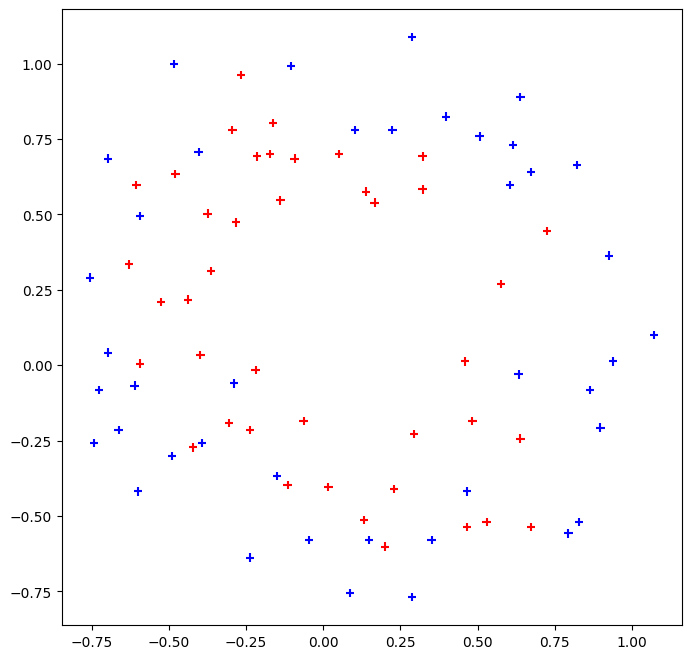

In [4]:
color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
fig = plt.figure(figsize=  (8,8))
fig = plt.scatter(data_train.iloc[:,0], data_train.iloc[:,1], c = data_train.Y, cmap = color_map, marker='+')

## Fitting a decision tree

In [5]:
# The basic decision tree can be obtained easily by this command
dt = tree.DecisionTreeClassifier().fit(data_train.iloc[:,:2],data_train.Y)
# More advanced options can be inserted into the 'DecisionTreeClassifier' function (we will see some later)
# The 'fit' function needs to have 2 parameters (at least) : 
# - the set of features describing the examples (here the 2 first columns of our train set)
# - the associated labels (classes, here the column 'Y' of our train set)


## Visualizing the obtained tree

[Text(0.6071428571428571, 0.9545454545454546, 'x[0] <= 0.76\ngini = 0.5\nsamples = 82\nvalue = [41, 41]'),
 Text(0.5595238095238095, 0.8636363636363636, 'x[0] <= -0.646\ngini = 0.494\nsamples = 74\nvalue = [33, 41]'),
 Text(0.5833333333333333, 0.9090909090909092, 'True  '),
 Text(0.5119047619047619, 0.7727272727272727, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6071428571428571, 0.7727272727272727, 'x[1] <= 0.703\ngini = 0.479\nsamples = 68\nvalue = [27, 41]'),
 Text(0.30952380952380953, 0.6818181818181818, 'x[1] <= -0.558\ngini = 0.427\nsamples = 55\nvalue = [17, 38]'),
 Text(0.09523809523809523, 0.5909090909090909, 'x[0] <= 0.175\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.047619047619047616, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.14285714285714285, 0.5, 'x[0] <= 0.244\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.09523809523809523, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.409090909090909

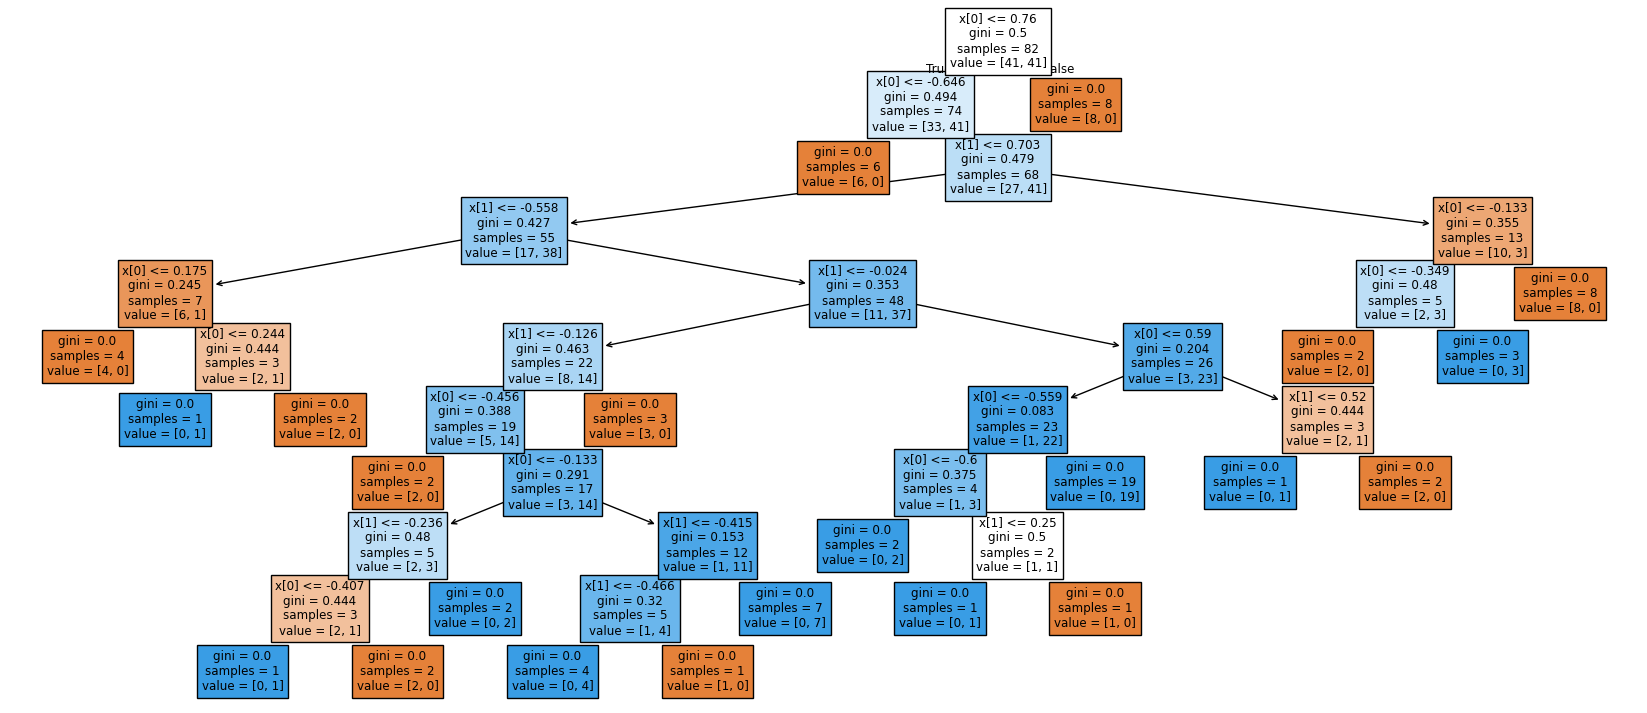

In [6]:
plt.figure(figsize=(21, 9))
tree.plot_tree(dt, filled=True)
# The 'plot_tree' function outputs two things : 
# - a text version of the tree (where are written the informations about all the nodes of the tree)
# - a graphical representation of the tree (right branches correspond to answer 'no' and left branches 'yes')

Questions :
   - What is the Gini index at the root of the tree ? 

In [18]:
# Gini index at the root of the tree
print("Gini index at root:", dt.tree_.impurity[0])


Gini index at root: 0.5


- How many leaves are there in this tree ? You should see that all the leaves are 'pure' (i.e., only 1 class is present inside the leaves). This is normal for the basic version of a decision tree

In [19]:
# Number of leaves in the tree
print("Number of leaves:", dt.get_n_leaves())

Number of leaves: 22


Questions : 
- Look at the first example of the training set. What are its features and its class ?

- How this example is classified by the tree (by just looking at the tree)? Is the tree making a right prediction ? Is it normal ?

In [7]:
# We can obtain automatically the prediction of the tree for any example with the 'predict' command (as for logistic regression):
dt.predict(data_train.iloc[:1,:2]) # here I ask to predict the first example of the train set, need to give its features

array([0])

Question : Using the 'score' command (as for logistic regression), compute the performance score of this tree on the trainig set. You should obtain a particular score.

Question : Same question but on the validation set

The function 'draw_boundary_tree' plots the decision boundary (only for dataset with 2 features of course).
As in previous TP, you need to give some parameters : 
 - the model, here a tree
 - the dataset of examples that you want to plot together with the boundary
 - and coordinates for min and max of x-axis and y-axis
An example of the use of this function with our data and tree is given right after

In [8]:
def draw_boundary_tree(model, data, x_min, x_max, y_min, y_max):
    h = 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+')
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)

/Users/joseantonioruizheredia/Code/Python/MachineLearningLabs/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


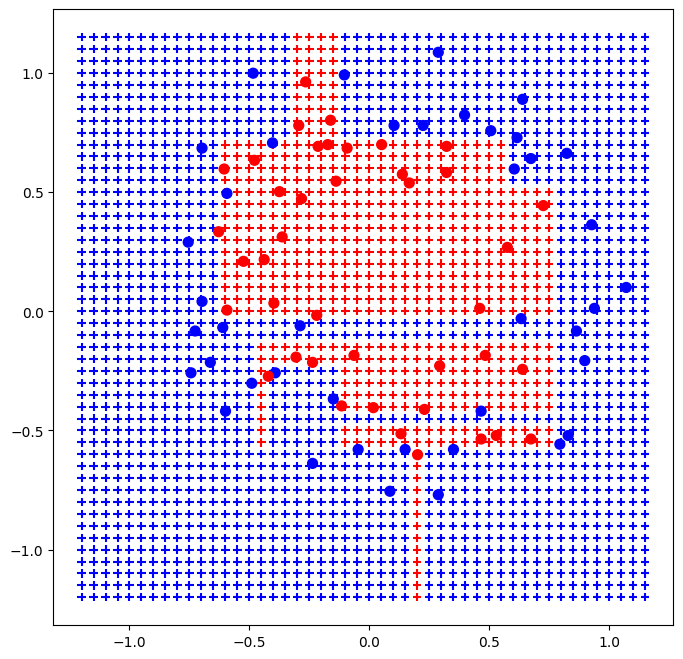

In [9]:
draw_boundary_tree(dt, data_train, -1.2, 1.2, -1.2, 1.2)

Question : Why this boundary is typical to a decision tree ? What kind of phenomenon can you observe here ?

The boundary is typical of a decision tree because it is made up of **axis-aligned** (vertical and horizontal) splits. 

Decision trees split the data using *thresholds* on individual features, so the regions are always rectangles. 

This creates a *blocky* or *staircase* pattern, not smooth curves. 

You can also see **overfitting**: the tree tries to perfectly separate the training data, leading to very complex boundaries that may not generalize well.

## Pruning the tree

As explained in the CM, the basic decision tree is only composed of pure leaves which might sometimes lead to a model that is too complex. In order to simplify the model, we can prune the tree. 
One way to do this in Python (with the sklearn package) is to use a complexity factor alpha that penalizes the number of nodes in the tree. 

If alpha = 0, there is no penalty for the number of nodes. It is as the basic model. But when alpha increases, it gives more penalty to the number of nodes and so tries to create tree with less nodes (and so with leaves that are not always pure). 

The values of alpha that needs to be considered depend on the dataset. We can obtain all the possible values of alpha for a given dataset by the following commands

In [10]:
clf = tree.DecisionTreeClassifier() # first declare a tree
path = clf.cost_complexity_pruning_path(data_train.iloc[:,0:2], data_train.Y) # then ask for all the possible values 
# of alpha to prune this tree (depends on the training set)
path

{'ccp_alphas': array([0.        , 0.0077766 , 0.01045296, 0.01117886, 0.01263351,
        0.01626016, 0.02513799, 0.02727425, 0.02814259, 0.05398197,
        0.05405405]),
 'impurities': array([0.        , 0.0233298 , 0.04423572, 0.06659345, 0.10449397,
        0.12075413, 0.14589213, 0.22771487, 0.28400004, 0.44594595,
        0.5       ])}

You should see above that, for our training set, 11 different trees can be obtained, from basic tree (alpha = 0 -> no pruning) to maximum pruning (here alpha = 0.05405405). 

The values above correspond to the different values of alpha that we can use ('ccp_alpha') and the associated average impurity in the leaves ('impurities'). When alpha = 0, no impurity -> normal. 

Below, you'll find how to plot the level of impurity VS the values of alpha. As alpha increases, the impurity increases as well. 

Text(0, 0.5, 'total impurity of leaves')

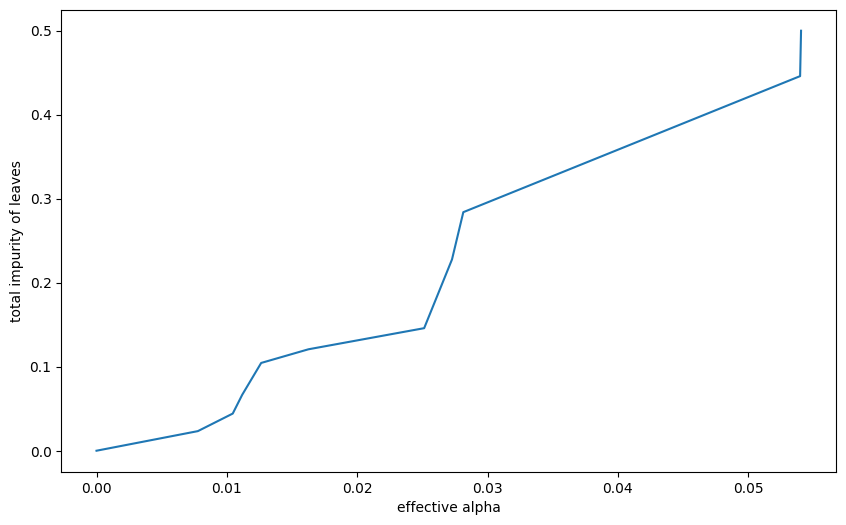

In [11]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

If you want to build a tree with a particular value of alpha, you need to specify it into the 'DecisionTreeClassifier' function (see below)

In [12]:
dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=path.ccp_alphas[2]).fit(data_train.iloc[:,0:2], data_train.Y)
# Here I asked for the third value from all the possible alpha (the first one is 0, already done with the basic tree)

Questions : 
- Plot the obtained tree to visualize the difference with the one obtained above (alpha = 0). In particular, you should see impure leaves


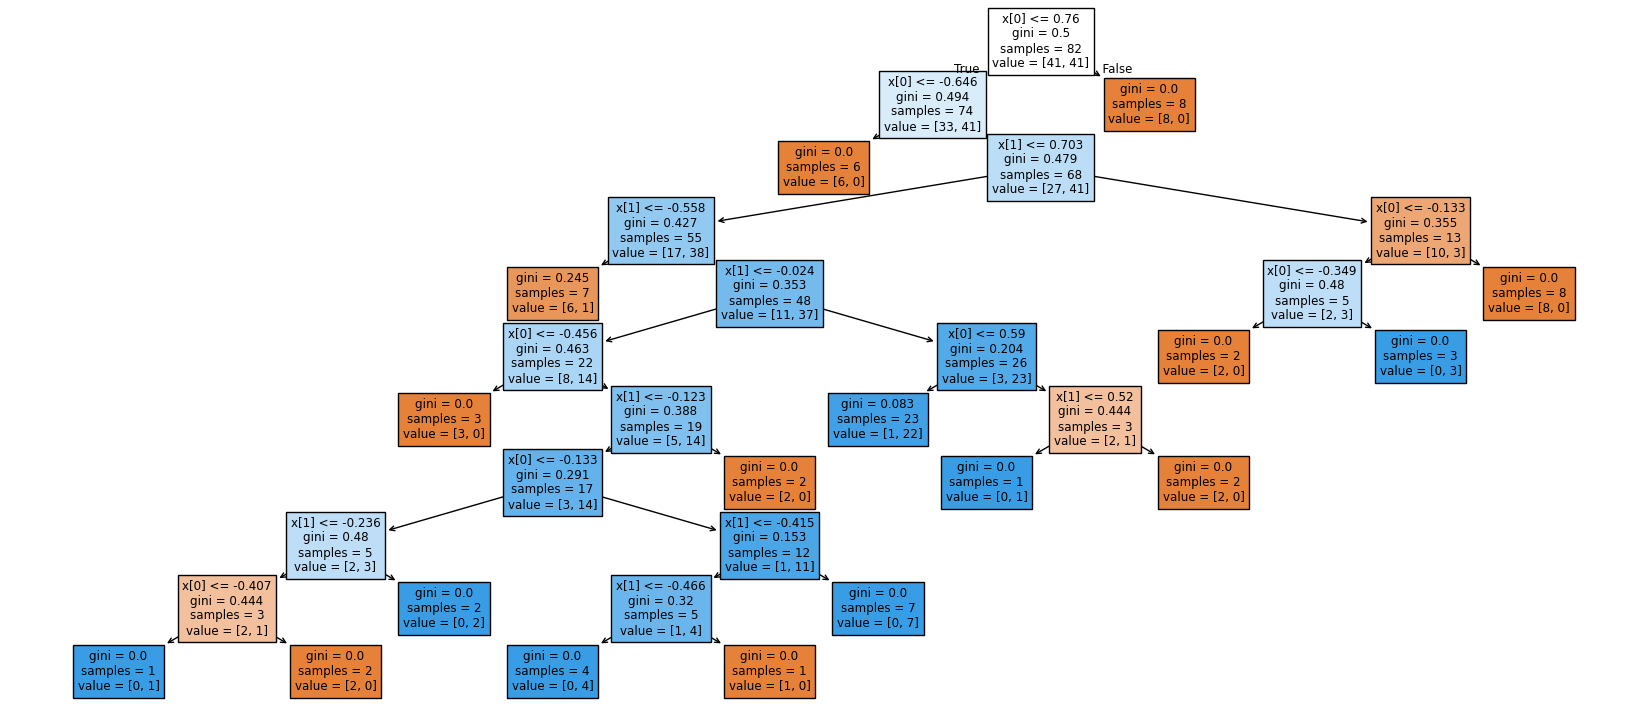

In [20]:
plt.figure(figsize=(21, 9))
tree.plot_tree(dt_pruned, filled=True)
plt.show()

Some leaves are **impure** (Gini > 0), unlike the unpruned tree where all leaves are pure.

- Visualize the decision boundary of this new tree


- Compute its performance on the training set and on the validation set

Question : 
- Using a for loop on the values of alpha (path.ccp_alphas), compute the prediction scores of all the possible pruned trees on the training set and on the validation set (you can store the scores in 2 different vectors).
- Plot on a graph these scores VS alpha (2 different curves). 
- You can also visualize the pruned tree and the decision boundary to see how it evolves with pruning.
- Which pruned tree will you choose here ? Draw its decision boundary
- Estimate its generalization error

# Exercise 2 : with a real dataset of handwritten digits

You will now work with a real dataset containing black and white images of handwritten digits.

Each image has 28*28 pixels (of value 0 or 1, for white or black) and contains one handwritten digit (from 0 to 9).
The file 'cp_sample.csv' contains 1000 such images (in vectorial form, i.e. only the pixel values and the label).

Below, the command to load this dataset.

You see that it contains 1000 rows (1 row -> 1 image) and 785 columns (784 pixel values, and the label)

In [13]:
mnist = pd.read_csv('cp_sample.csv', sep=';')
mnist.shape

(1000, 785)

Question : What is the distribution of the labels in this dataset (i.e., how many images have label 0, label 1, ...) ?

*Hint : value_counts()*

In [14]:
# The values of pixels and label for one image can be obtained by the command:
mnist.iloc[0,:] # First image of the dataset
# You can see that the label is in the column 'label' and the other columns are pixel0, pixel1, etc...
# This first image represents the digit 1

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

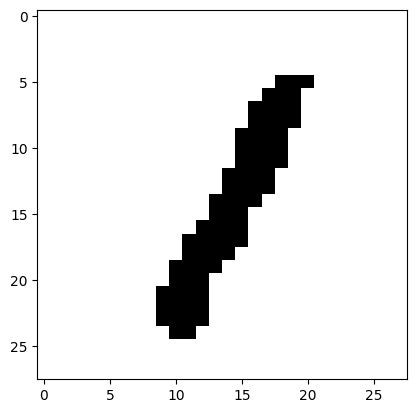

In [15]:
# It is possible to see an image from its pixel values using the following command:
plt.imshow(mnist.iloc[0,1:].to_numpy().reshape(28,28),cmap = 'Greys')
# Here is the first image, representing a 1

Question : Split this dataset into train / validation / test sets

Questions : 
 - Fit a decision tree to the training set (don't try to plot it, it might be huge)
 - What is the prediction score of this tree on the training set ? on the validation set ?

You should see that the prediction score of the decision tree on the validation set is not extremely high.
We will try to improve the performance by pruning the tree

Questions : 
   - As in the first exercise, try all the possible pruning of the tree and select the most adapted one.
   - What is the score of the selected tree on the training set ? on the validation set ?
   - What is the estimation of the generalization error of this tree ?

## Trying the model on your own written image 

You can try the model that you obtained above to recognize written digit of your own. For that, you need to create a 28*28 png file where you draw a digit. Save the file and then you can use the following function to visalize your image and convert it to the format that the model will accept (784-dimensional vector). 

See example below with the file 'test_0.png' that I have created

In [16]:
import skimage.io
def read_myimage(f):
    myimage = skimage.io.imread(f, as_gray=True)
    i0 = np.where(myimage==0)
    i1 = np.where(myimage == 1)
    myimage[i0] = 1
    myimage[i1] = 0
    plt.imshow(myimage, cmap='Greys')
    return myimage.reshape(1,28*28)

In [17]:
# use this code if your image is already 28x28 and binary (black and white)
myim = read_myimage('test_0.png')
dt.predict(myim) 

FileNotFoundError: No such file: '/Users/joseantonioruizheredia/Code/Python/MachineLearningLabs/test_0.png'

In [ ]:
# use this code if your image is neither 28x28 nor binary (black and white)

from skimage.transform import resize

myim = myimage = skimage.io.imread('test_0.jpeg', as_gray=True)

fig, axes = plt.subplots(ncols=4, figsize=(12, 3))
ax = axes.ravel()
ax[0] = plt.subplot(1, 4, 1)
ax[1] = plt.subplot(1, 4, 2)
ax[2] = plt.subplot(1, 4, 3)
ax[3] = plt.subplot(1, 4, 4)

# show the original image
ax[0].imshow(myimage, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

# Binarize the image
thresh = 0.60*np.max(myimage) # 60% of the maximum intensity may be enough to detect the black pixels
i0 = np.where(myimage <= thresh) 
i1 = np.where(myimage > thresh)
myimage[i0] = 0 # Black pixels
myimage[i1] = 1 # White pixels

ax[1].imshow(myimage, cmap=plt.cm.gray)
ax[1].set_title('Binarized')
ax[1].axis('off')

# Get the bounding box coordinates of the digit
top, bottom = np.min(i0[0]), np.max(i0[0])
left, right = np.min(i0[1]), np.max(i0[1])
myimage = myimage[top:bottom, left:right]
ax[2].imshow(myimage, cmap=plt.cm.gray)
ax[2].set_title('Cropped')
ax[2].axis('off')

# pad the image to get a squared image
h, w = myimage.shape
if h > w:
    pad = (h - w) // 2
    myimage = np.pad(myimage, ((1,1),(pad, pad)), 'constant', constant_values=1)
elif w > h:
    pad = (w - h) // 2
    myimage = np.pad(myimage, ((pad, pad),(1,1)), 'constant', constant_values=1)

ax[2].imshow(myimage, cmap=plt.cm.gray)
ax[2].set_title('Squared')
ax[2].axis('off')

# resize the image to 28x28 and binarize again
myimage = resize(myimage, (28,28), anti_aliasing=True)
thresh = 0.9*np.max(myimage) 
i0 = np.where(myimage <= thresh) 
i1 = np.where(myimage > thresh)
myimage[i0] = 0
myimage[i1] = 1
ax[3].imshow(myimage, cmap=plt.cm.gray)
ax[3].set_title('Resized')
ax[3].axis('off')

plt.show()

## Logistic regression for the same task

The results obtained with the best tree should not be very interesting. You can try now with logistic regression and estimate the generalization error of logistic regression on this dataset to see that it performs much better.

Questions : 
- Fit a logistic regression model to the training set and estimate the generalization error (no need to add non-linear features as here the features are 0 or 1, so polynomial faeatures will not help)
- Use this model to predict the image 'test_0.png'. Should work better!

# Using Histogram of Oriented Gradients (HOG) representation rather than pixel values

In the previous section, we have directy used the pixel values as features to perform classification. For complex images, the pixel values might not be adapted to this task. Better image representations can be used in order to transform an image into a feature vector that contains informations about the content of an image (colors, orientations for instance). You will have an introduction about this in the INV course (with Thomas Corpetti, soon).
In this part of the TP, we will use a quite simple image representation to perform classification : the HOG representation (some informations can be found here : 
https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html)

This representation computes histograms about the orientations of the gradients that are found in an image. Actually, it splits the image into sub-images (blocks) and compute one histogram per block. The number of orientations and blocks are parameters of the HOG representation. 
For instance, with our images (28*28), if we ask for blocks of 14*14 pixels and 8 different orientations (angles), it will produce 4 (4 blocks of size 14*14 in the image) histograms of size 8 (8 orientations), hence a vector of size 32.

Each image will now be represented with this vector of size 32 (rather than the 784 pixel values). 

Below, an example of how to produce this vector from an image

In [ ]:
from skimage.feature import hog

In [ ]:
myimage = mnist.iloc[0,1:] # first image of the mnist dataset (784 pixel values)
myimage_hog = hog(myimage.to_numpy().reshape(28,28,1), orientations=8, pixels_per_cell=(14,14), cells_per_block=(1,1))
myimage_hog

You can see that the result is a vector of size 32 (4 blocks, and histograms with 8 orientations). Each histogram is normalized so that the sum of square values in the histogram equals 1. You can check that the sum of the 8 first values (squared) equals 1. 

In the following, we will transform each image of our dataset using this represenation and then use this new dataset as input to classifiers, hoping that it will improve the classification performance. 

The next two cells transform the training, validation and test set with the HOG representation (blocks of 14*14 pixels and 8 orientations, you can change these parameters later)

In [ ]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1))))

In [ ]:
hog_train = data_train.apply(my_hog, axis=1, args=(8,14))
hog_valid= data_valid.apply(my_hog, axis=1, args=(8,14))
hog_test = data_test.apply(my_hog, axis=1, args=(8,14))
hog_train['label'] = data_train.label
hog_valid['label'] = data_valid.label
hog_test['label'] = data_test.label

In [ ]:
hog_train
# you see here that each image of the training set is now a vector of length 32

Exercise : Apply the procedure used in this TP to find the best tree adapted to this new dataset, and estimate its generalization error. Is it better than with raw images ?

Question : You can try now to use a richer representation (more blocks)

Question : Now use the logistic regression on this new dataset and estimate the generalization error. Conclusion ?